In [49]:
from collections import namedtuple
servoData = namedtuple('servoData', 'motor, screw, pgain, vgain, cls')

data = [servoData(*line.split(",")) for line in open('servo.data')]

data[:10]

[servoData(motor='E', screw='E', pgain='5', vgain='4', cls=' 0.28125095\n'),
 servoData(motor='B', screw='D', pgain='6', vgain='5', cls=' 0.5062525\n'),
 servoData(motor='D', screw='D', pgain='4', vgain='3', cls=' 0.35625148\n'),
 servoData(motor='B', screw='A', pgain='3', vgain='2', cls=' 5.500033\n'),
 servoData(motor='D', screw='B', pgain='6', vgain='5', cls=' 0.35625148\n'),
 servoData(motor='E', screw='C', pgain='4', vgain='3', cls=' 0.8062546\n'),
 servoData(motor='C', screw='A', pgain='3', vgain='2', cls=' 5.100014\n'),
 servoData(motor='A', screw='A', pgain='3', vgain='2', cls=' 5.7000422\n'),
 servoData(motor='C', screw='A', pgain='6', vgain='5', cls=' 0.76875436\n'),
 servoData(motor='D', screw='A', pgain='4', vgain='1', cls=' 1.0312537\n')]

In [50]:
for i, item in enumerate(data):
    clsNew = item.cls.strip()
    clsNew = float(clsNew)
    clsNew = float("{0:.3f}".format(clsNew))
    data[i] = servoData(item.motor, item.screw, int(item.pgain), int(item.vgain), clsNew)
data[:10]

[servoData(motor='E', screw='E', pgain=5, vgain=4, cls=0.281),
 servoData(motor='B', screw='D', pgain=6, vgain=5, cls=0.506),
 servoData(motor='D', screw='D', pgain=4, vgain=3, cls=0.356),
 servoData(motor='B', screw='A', pgain=3, vgain=2, cls=5.5),
 servoData(motor='D', screw='B', pgain=6, vgain=5, cls=0.356),
 servoData(motor='E', screw='C', pgain=4, vgain=3, cls=0.806),
 servoData(motor='C', screw='A', pgain=3, vgain=2, cls=5.1),
 servoData(motor='A', screw='A', pgain=3, vgain=2, cls=5.7),
 servoData(motor='C', screw='A', pgain=6, vgain=5, cls=0.769),
 servoData(motor='D', screw='A', pgain=4, vgain=1, cls=1.031)]

In [53]:
ls = ['A', 'B', 'C', 'D', 'E']
from collections import defaultdict, Counter
# motor with servo
motorData = defaultdict(list)
for item in data:
    
    motorData[item.motor].append(item.screw)
# Counter([item.screw for item in data])

In [54]:
motorData


defaultdict(list,
            {'E': ['E',
              'C',
              'C',
              'C',
              'B',
              'D',
              'C',
              'E',
              'C',
              'D',
              'A',
              'B',
              'A',
              'B',
              'C',
              'D',
              'A',
              'A',
              'E',
              'D',
              'B',
              'B',
              'A',
              'D',
              'A',
              'D',
              'E',
              'E',
              'C',
              'A',
              'E',
              'B',
              'B'],
             'B': ['D',
              'A',
              'E',
              'C',
              'C',
              'B',
              'C',
              'B',
              'E',
              'C',
              'D',
              'A',
              'A',
              'E',
              'B',
              'D',
              'C',
              'D',
  

In [55]:
motorServoCount = defaultdict(Counter)
for motorType, servoTypes in motorData.items():
    motorServoCount[motorType]= Counter(servoTypes)

In [56]:
motorServoCount

defaultdict(collections.Counter,
            {'E': Counter({'E': 6, 'C': 7, 'B': 7, 'D': 6, 'A': 7}),
             'B': Counter({'D': 7, 'A': 8, 'E': 7, 'C': 7, 'B': 7}),
             'D': Counter({'D': 3, 'B': 7, 'A': 7, 'C': 3, 'E': 2}),
             'C': Counter({'A': 12, 'C': 7, 'E': 7, 'D': 7, 'B': 7}),
             'A': Counter({'A': 8, 'D': 7, 'C': 7, 'B': 7, 'E': 7})})

# <h3> To-do: adjust level of precision for values of attribute: class (cls). </h3>

# Multiplot

<h3> 
1. Produce 5 * 4 = 20 plots <br>
2. Based on the resulting pattern, make one or more relationship more sophisticated
</h3>

In [57]:
import matplotlib
import matplotlib.pyplot as plt

In [58]:
figure = plt.figure(figsize=[5.0,5.0])

<Figure size 360x360 with 0 Axes>

 <h3> Plotting types of motor with types of screws </h3>

In [59]:
index = [ key for key, _ in motorServoCount.items() ]

# plt.plot(x, y)


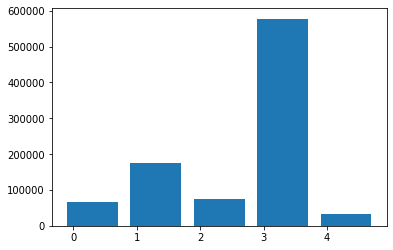

In [37]:
import numpy as np
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
index = np.arange(len(columns)) + 0.3
for row in range(1):
    plt.bar(index, data[row])#, bar_width, bottom=y_offset, color=colors[row])
    # y_offset = y_offset + data[row]
# plt.bar([0, 1, 2, 3, 4], [data[0], data[1], data[2], data[3], data[4]])

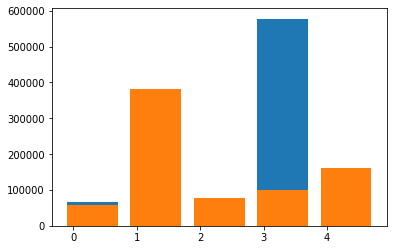

In [39]:
import numpy as np
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
index = np.arange(len(columns)) + 0.3
for row in range(2):
    plt.bar(index, data[row])#, bar_width, bottom=y_offset, color=colors[row])
    # y_offset = y_offset + data[row]
# plt.bar([0, 1, 2, 3, 4], [data[0], data[1], data[2], data[3], data[4]])

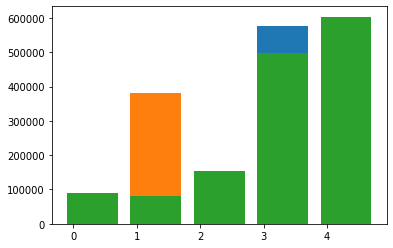

In [40]:
import numpy as np
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
index = np.arange(len(columns)) + 0.3
for row in range(3):
    plt.bar(index, data[row])#, bar_width, bottom=y_offset, color=colors[row])
    # y_offset = y_offset + data[row]
# plt.bar([0, 1, 2, 3, 4], [data[0], data[1], data[2], data[3], data[4]])

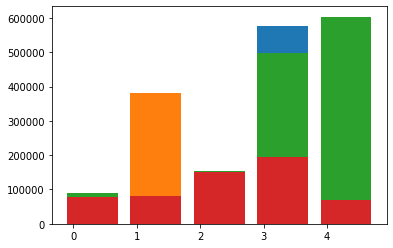

In [41]:
import numpy as np
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
index = np.arange(len(columns)) + 0.3
for row in range(4):
    plt.bar(index, data[row])#, bar_width, bottom=y_offset, color=colors[row])
    # y_offset = y_offset + data[row]
# plt.bar([0, 1, 2, 3, 4], [data[0], data[1], data[2], data[3], data[4]])

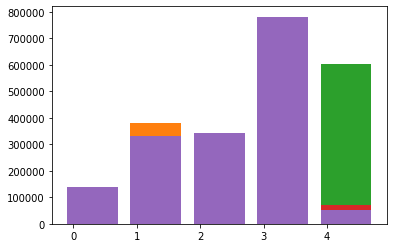

In [42]:
import numpy as np
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]
columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
index = np.arange(len(columns)) + 0.3
for row in range(5):
    plt.bar(index, data[row])#, bar_width, bottom=y_offset, color=colors[row])
    # y_offset = y_offset + data[row]
# plt.bar([0, 1, 2, 3, 4], [data[0], data[1], data[2], data[3], data[4]])